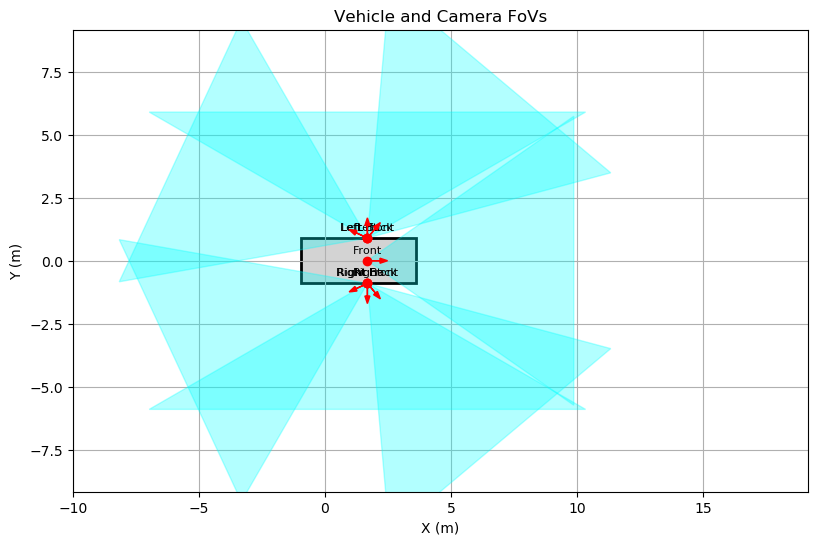

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, Polygon
from dataclasses import dataclass
from typing import List

@dataclass
class Camera:
    x: float                  # position relative to chassis frame
    y: float
    theta: float              # orientation in degrees
    fov: float                # field of view in degrees
    range: float = 10.0       # viewing distance
    name: str = ""            # optional label

@dataclass
class Vehicle:
    wheelbase: float
    front_offset: float
    rear_offset: float
    width: float

    @property
    def length(self):
        return self.front_offset + self.wheelbase + self.rear_offset


def plot_vehicle_and_cameras(vehicle: Vehicle, cameras: List[Camera]):
    L = vehicle.length

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_aspect('equal')

    # Draw vehicle rectangle (rear axle is at origin)
    vehicle_x = -vehicle.rear_offset
    vehicle_y = -vehicle.width / 2
    rect = Rectangle((vehicle_x, vehicle_y), L, vehicle.width,
                     edgecolor='black', facecolor='lightgray', lw=2, zorder=1)
    ax.add_patch(rect)

    # Draw each camera
    for i, cam in enumerate(cameras):
        cam_theta_rad = np.deg2rad(cam.theta)
        fov_rad = np.deg2rad(cam.fov)

        left_angle = cam_theta_rad - fov_rad / 2
        right_angle = cam_theta_rad + fov_rad / 2

        left_x = cam.x + cam.range * np.cos(left_angle)
        left_y = cam.y + cam.range * np.sin(left_angle)
        right_x = cam.x + cam.range * np.cos(right_angle)
        right_y = cam.y + cam.range * np.sin(right_angle)

        # Draw FoV cone
        cone = Polygon([[cam.x, cam.y], [left_x, left_y], [right_x, right_y]],
                       color='cyan', alpha=0.3, zorder=2)
        ax.add_patch(cone)

        # Draw camera location and direction
        ax.plot(cam.x, cam.y, 'ro', zorder=3)
        label = cam.name if cam.name else f"Cam {i}"
        ax.text(cam.x, cam.y + 0.3, label, ha='center', fontsize=8)

        ax.arrow(cam.x, cam.y,
                 0.5 * np.cos(cam_theta_rad), 0.5 * np.sin(cam_theta_rad),
                 head_width=0.2, head_length=0.3, fc='r', ec='r', zorder=3)

    # Formatting
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")
    ax.grid(True)
    ax.set_title("Vehicle and Camera FoVs")
    ax.set_xlim(-5*2, (L + 5)*2)
    ax.set_ylim(-L * 2, L * 2)

    plt.show()

# === Example usage ===

vehicle = Vehicle(
    wheelbase=2.766,
    front_offset=0.853,
    rear_offset=0.965,
    width=1.8
)

sensor_box_center = vehicle.wheelbase/2+0.3
sbc = sensor_box_center
hw = vehicle.width/2

cameras = [
    #Camera(x=sbc, y=0.0, theta=0, fov=30, name="Front LR"),
    Camera(x=sbc, y=0.0, theta=0, fov=70, name="Front"),
    Camera(x=sbc, y=hw, theta=50, fov=70, name="Left Front"),
    Camera(x=sbc, y=hw, theta=155, fov=70, name="Left Back"),
    Camera(x=sbc, y=hw, theta=90, fov=120, name="Left"),
    
    Camera(x=sbc, y=-hw, theta=-50, fov=70, name="Right Front"),
    Camera(x=sbc, y=-hw, theta=-155, fov=70, name="Right Back"),
    Camera(x=sbc, y=-hw, theta=-90, fov=120, name="Right"),
    
    #Camera(x=-0.5, y=0.0, theta=180, fov=120, name="Rear"),
]

plot_vehicle_and_cameras(vehicle, cameras)
